#                        Movie Data Analysis for SussexBudgetProductions upcoming movie
                                            

# Overview 


This report that gives overview on the data analysis, I have performed on the Imdb data that is given in the movie_metadata file. The objective of this report is to give insight on the approach to be taken to enhance the profit for the next movie that is slated to come up in next year. I will be performing various techniques to come up with the top 10 most appropriate directors who can increase the profit for next film.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats 

In the above code I will be importing all the necessary libraries needed to execute the different techniques 

In [2]:
#filename consist pathname of the data
filename='movie_metadata.csv'

# Reading the data from the csv file
movies=pd.read_csv(filename)

#displaying the last 5 columns of the dataframe
movies.tail(5) 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


# Data Cleaning

In the data cleaning process, I will be removing all the unwanted data that I won't be requiring in the further steps. In this step I will be removing all the irrelevant columns for exploratory data analysis and hypothesis testing. I will also be truncating the rows with null values in the relevant field as the null value can affect our outcome and I won't  be able to obtain desirable result.

In [3]:
# Removing the irrelevant columns that is not required for further processing
movie1=movies.drop(columns=['color','num_critic_for_reviews','duration',
                                    'actor_3_facebook_likes', 'actor_2_name',
                                    'actor_1_facebook_likes','actor_1_name',
                                    'num_voted_users', 'cast_total_facebook_likes',
                                    'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
                                    'movie_imdb_link', 'num_user_for_reviews','content_rating',
                                    'actor_2_facebook_likes' ,'aspect_ratio','country',
                                    'movie_facebook_likes'],axis=1)

In [4]:
# Getting rid of null values in the director_name,gross,budget columns
moviecdn=movie1.dropna(axis='index',how='any',subset=['director_name','gross','budget'])

In [5]:
#Checking if there is any null values in the budget column
moviecdn[moviecdn['budget'].isnull()]

,director_name,director_facebook_likes,gross,genres,movie_title,language,budget,title_year,imdb_score


In [6]:
#Finding out the percentage of the null values in each column of the dataframe
moviecdn.isnull().sum().sort_values(ascending=False)/len(moviecdn)*100

language                   0.077101
director_name              0.000000
director_facebook_likes    0.000000
gross                      0.000000
genres                     0.000000
movie_title                0.000000
budget                     0.000000
title_year                 0.000000
imdb_score                 0.000000
dtype: float64

In [7]:
# Function to change language into English for row with null value in the language column and  language as none
def change_lang(language):
    if pd.isnull(language):
        lang='English'
    elif language=='None':
        lang='English'
    else:
        lang=language
    return lang

#Executing change_lang function for language field in each row in the dataframe
moviecdn['clean_language']=moviecdn['language'].map(change_lang)
moviecdn.tail(2)

C:\Users\sheri\AppData\Local\Temp\ipykernel_12236\2833116208.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviecdn['clean_language']=moviecdn['language'].map(change_lang)


,director_name,director_facebook_likes,gross,genres,movie_title,language,budget,title_year,imdb_score,clean_language
5037,Edward Burns,0.0,4584.0,Comedy|Drama,Newlyweds,English,9000.0,2011.0,6.4,English
5042,Jon Gunn,16.0,85222.0,Documentary,My Date with Drew,English,1100.0,2004.0,6.6,English


In [8]:
#Function to convert the unit amount into million
def change_million(amount):
    calculated_amt=amount/1000000
    return calculated_amt

#Creating a new field calculated_budget in which budget in pounds is converted into million pounds
moviecdn['calculated_budget']=moviecdn['budget'].map(change_million)
#Creating a new field calculated_gross in which gross in pounds is converted into million pounds
moviecdn['calculated_gross']=moviecdn['gross'].map(change_million)
moviecdn.tail(4)

C:\Users\sheri\AppData\Local\Temp\ipykernel_12236\4099716133.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviecdn['calculated_budget']=moviecdn['budget'].map(change_million)
C:\Users\sheri\AppData\Local\Temp\ipykernel_12236\4099716133.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviecdn['calculated_gross']=moviecdn['gross'].map(change_million)


,director_name,director_facebook_likes,gross,genres,movie_title,language,budget,title_year,imdb_score,clean_language,calculated_budget,calculated_gross
5034,Neill Dela Llana,0.0,70071.0,Thriller,Cavite,English,7000.0,2005.0,6.3,English,0.0070,0.070071
5035,Robert Rodriguez,0.0,2040920.0,Action|Crime|Drama|Romance|Thriller,El Mariachi,Spanish,7000.0,1992.0,6.9,Spanish,0.0070,2.040920
5037,Edward Burns,0.0,4584.0,Comedy|Drama,Newlyweds,English,9000.0,2011.0,6.4,English,0.0090,0.004584
5042,Jon Gunn,16.0,85222.0,Documentary,My Date with Drew,English,1100.0,2004.0,6.6,English,0.0011,0.085222


In [9]:
#Creating a new column profit to estimate profit of each movie
moviecdn['profit']=moviecdn['calculated_gross']-moviecdn['calculated_budget']
moviecdn.head(4)

C:\Users\sheri\AppData\Local\Temp\ipykernel_12236\1608108443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviecdn['profit']=moviecdn['calculated_gross']-moviecdn['calculated_budget']


,director_name,director_facebook_likes,gross,genres,movie_title,language,budget,title_year,imdb_score,clean_language,calculated_budget,calculated_gross,profit
0,James Cameron,0.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,English,237000000.0,2009.0,7.9,English,237.0,760.505847,523.505847
1,Gore Verbinski,563.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,English,300000000.0,2007.0,7.1,English,300.0,309.404152,9.404152
2,Sam Mendes,0.0,200074175.0,Action|Adventure|Thriller,Spectre,English,245000000.0,2015.0,6.8,English,245.0,200.074175,-44.925825
3,Christopher Nolan,22000.0,448130642.0,Action|Thriller,The Dark Knight Rises,English,250000000.0,2012.0,8.5,English,250.0,448.130642,198.130642


In [10]:
#Display the details about each column in dataframe 
moviecdn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   director_name            3891 non-null   object 
 1   director_facebook_likes  3891 non-null   float64
 2   gross                    3891 non-null   float64
 3   genres                   3891 non-null   object 
 4   movie_title              3891 non-null   object 
 5   language                 3888 non-null   object 
 6   budget                   3891 non-null   float64
 7   title_year               3891 non-null   float64
 8   imdb_score               3891 non-null   float64
 9   clean_language           3891 non-null   object 
 10  calculated_budget        3891 non-null   float64
 11  calculated_gross         3891 non-null   float64
 12  profit                   3891 non-null   float64
dtypes: float64(8), object(5)
memory usage: 425.6+ KB


In [11]:
#To view the duplicate values in dataframe
moviecdn[movie1.duplicated()]

C:\Users\sheri\AppData\Local\Temp\ipykernel_12236\2202165164.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moviecdn[movie1.duplicated()]


,director_name,director_facebook_likes,gross,genres,movie_title,language,budget,title_year,imdb_score,clean_language,calculated_budget,calculated_gross,profit
137,David Yates,282.0,124051759.0,Action|Adventure|Drama|Romance,The Legend of Tarzan,English,180000000.0,2016.0,6.6,English,180.000000,124.051759,-55.948241
187,Bill Condon,386.0,292298923.0,Adventure|Drama|Fantasy|Romance,The Twilight Saga: Breaking Dawn - Part 2,English,120000000.0,2012.0,5.5,English,120.000000,292.298923,172.298923
303,Joe Wright,456.0,34964818.0,Adventure|Family|Fantasy,Pan,English,150000000.0,2015.0,5.8,English,150.000000,34.964818,-115.035182
389,Josh Trank,128.0,56114221.0,Action|Adventure|Sci-Fi,Fantastic Four,English,120000000.0,2015.0,4.3,English,120.000000,56.114221,-63.885779
395,Rob Cohen,357.0,144512310.0,Action|Crime|Thriller,The Fast and the Furious,English,38000000.0,2001.0,6.7,English,38.000000,144.512310,106.512310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,Julie Taymor,278.0,24343673.0,Drama|Fantasy|Musical|Romance,Across the Universe,English,45000000.0,2007.0,7.4,English,45.000000,24.343673,-20.656327
4905,Steven Soderbergh,0.0,32154410.0,Crime|Drama|Thriller,Side Effects,English,30000000.0,2013.0,7.1,English,30.000000,32.154410,2.154410
4936,Tobe Hooper,365.0,30859000.0,Horror|Thriller,The Texas Chain Saw Massacre,English,83532.0,1974.0,7.5,English,0.083532,30.859000,30.775468
4971,Dennis Iliadis,29.0,32721635.0,Crime|Horror|Thriller,The Last House on the Left,English,15000000.0,2009.0,6.6,English,15.000000,32.721635,17.721635


In [12]:
#To remove the duplicate rows from the dataframe
moviecln=moviecdn.drop_duplicates(keep='first')

In [13]:
moviecln[moviecln.duplicated()]

,director_name,director_facebook_likes,gross,genres,movie_title,language,budget,title_year,imdb_score,clean_language,calculated_budget,calculated_gross,profit


# Exploratory Data Analysis(EDA)

In [14]:
#To get statistical information of each numeric columns in the dataframe
moviecln.describe()

,director_facebook_likes,gross,budget,title_year,imdb_score,calculated_budget,calculated_gross,profit
count,3790.000000,3.790000e+03,3.790000e+03,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,786.612401,5.019224e+07,4.472383e+07,2003.011873,6.461689,44.723828,50.192238,5.468410
std,3038.048782,6.872024e+07,2.250798e+08,9.992878,1.057649,225.079804,68.720235,228.898340
min,0.000000,1.620000e+02,2.180000e+02,1920.000000,1.600000,0.000218,0.000162,-12213.298588
25%,10.000000,6.534417e+06,9.525000e+06,1999.000000,5.900000,9.525000,6.534417,-10.212429
50%,58.000000,2.717721e+07,2.400000e+07,2005.000000,6.600000,24.000000,27.177213,0.751257
75%,221.000000,6.495038e+07,5.000000e+07,2010.000000,7.200000,50.000000,64.950384,24.272463
max,23000.000000,7.605058e+08,1.221550e+10,2016.000000,9.300000,12215.500000,760.505847,523.505847


Here I will be lowering my budget to 1.5 million pound which will be our target budget and we will get all the movies that were produced within £1.5 million. And we are only considering the movies that made in English and only after 1990. Because then people would be able to relate to the movies and more audience would turn up in the theatre.

In [15]:
#Creating dataframe which only have English language movies whose budget is within 1.5 million pounds and which released after 1990
max_budget=1.5
clean_movie=moviecln[(moviecln['calculated_budget']<=max_budget)&(moviecln['title_year']>1990)&(moviecln['language']=='English')]

In [16]:
#Displaying the dataframe
clean_movie

,director_name,director_facebook_likes,gross,genres,movie_title,language,budget,title_year,imdb_score,clean_language,calculated_budget,calculated_gross,profit
3821,Billy Bob Thornton,0.0,24475416.0,Drama,Sling Blade,English,890000.0,1996.0,8.0,English,0.8900,24.475416,23.585416
3941,Robert Lee King,0.0,265107.0,Comedy|Horror|Mystery,Psycho Beach Party,English,1500000.0,2000.0,6.3,English,1.5000,0.265107,-1.234893
3950,Jim Mickle,53.0,18469.0,Drama|Horror|Sci-Fi,Stake Land,English,650000.0,2010.0,6.5,English,0.6500,0.018469,-0.631531
4147,Susan Seidelman,39.0,3123749.0,Comedy|Romance,Boynton Beach Club,English,1500000.0,2005.0,6.5,English,1.5000,3.123749,1.623749
4216,Shane Meadows,222.0,327919.0,Crime|Drama,This Is England,English,1500000.0,2006.0,7.7,English,1.5000,0.327919,-1.172081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,Daryl Wein,38.0,76382.0,Romance,Breaking Upwards,English,15000.0,2009.0,6.2,English,0.0150,0.076382,0.061382
5033,Shane Carruth,291.0,424760.0,Drama|Sci-Fi|Thriller,Primer,English,7000.0,2004.0,7.0,English,0.0070,0.424760,0.417760
5034,Neill Dela Llana,0.0,70071.0,Thriller,Cavite,English,7000.0,2005.0,6.3,English,0.0070,0.070071,0.063071
5037,Edward Burns,0.0,4584.0,Comedy|Drama,Newlyweds,English,9000.0,2011.0,6.4,English,0.0090,0.004584,-0.004416


In [17]:
moviecln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3790 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   director_name            3790 non-null   object 
 1   director_facebook_likes  3790 non-null   float64
 2   gross                    3790 non-null   float64
 3   genres                   3790 non-null   object 
 4   movie_title              3790 non-null   object 
 5   language                 3787 non-null   object 
 6   budget                   3790 non-null   float64
 7   title_year               3790 non-null   float64
 8   imdb_score               3790 non-null   float64
 9   clean_language           3790 non-null   object 
 10  calculated_budget        3790 non-null   float64
 11  calculated_gross         3790 non-null   float64
 12  profit                   3790 non-null   float64
dtypes: float64(8), object(5)
memory usage: 414.5+ KB


Here I am considering the directors who directed English movie within £1.5 million and I will be looking his mean imdb score, 
budget, gross and profit for the movies they have directed within the targeted budget. So that we can have an idea of how well the movie directed by them is pulling off in box office.

In [18]:
#Grouping the rows according to director_name and finding mean of budget, gross, profit of each director
top_dir=clean_movie.groupby('director_name')[['director_name','imdb_score','calculated_budget','calculated_gross','profit']].mean()

#Resetting the index
top_directors=top_dir.reset_index()

#Displaying the data
top_directors

,director_name,imdb_score,calculated_budget,calculated_gross,profit
0,Adam Carolla,6.1,1.500,0.105943,-1.394057
1,Alex Craig Mann,4.6,0.500,0.001332,-0.498668
2,Alex Gibney,7.7,1.000,0.274661,-0.725339
3,Alex Kendrick,6.6,0.300,21.813071,21.513071
4,Alex Smith,6.1,0.500,0.013134,-0.486866
...,...,...,...,...,...
190,Vincent Gallo,7.5,1.500,2.365931,0.865931
191,Vincenzo Natali,7.3,0.365,0.489220,0.124220
192,William Brent Bell,4.2,1.000,53.245055,52.245055
193,Youssef Delara,5.7,0.427,2.833383,2.406383


But I am getting many directors whose movies have not done well in theatres so rather than considering those directors, I will only consider the directors whose movies have been raking in profit rather than loss. So I created the dataframe which only consists of directors whose films have earned profit. I am arranging the rows in increasing order of the director whose movie earned highest profit. 

In [19]:
#Creating dataframe consisting the director who gained profits
movie_dir=top_directors[top_directors['profit']>=0]

# Sorting the dataframe based on profit
movie_dir = movie_dir.sort_values('profit', ascending=False)
movie_dir

,director_name,imdb_score,calculated_budget,calculated_gross,profit
36,Daniel Myrick,6.40,0.060,140.530114,140.470114
142,Oren Peli,6.30,0.015,107.917283,107.902283
73,James Wan,7.25,1.350,54.572270,53.222270
192,William Brent Bell,4.20,1.000,53.245055,52.245055
76,Jared Hess,6.90,0.400,44.540956,44.140956
...,...,...,...,...,...
38,Daryl Wein,6.20,0.015,0.076382,0.061382
42,David Slade,7.10,0.950,1.007962,0.057962
35,Craig Zobel,6.40,0.270,0.318622,0.048622
154,Ray Griggs,5.10,0.400,0.425899,0.025899


We can see from dataframe that 97 directors have directed movies that have earned profit. From the group of these 97 directors I will only be considering the top 20 directors so that I can come up with appropriate analysis.

In [20]:
#Considering only top 20 directors
movie_x_dir=movie_dir[0:20]
movie_x_dir

,director_name,imdb_score,calculated_budget,calculated_gross,profit
36,Daniel Myrick,6.40,0.060,140.530114,140.470114
142,Oren Peli,6.30,0.015,107.917283,107.902283
73,James Wan,7.25,1.350,54.572270,53.222270
192,William Brent Bell,4.20,1.000,53.245055,52.245055
76,Jared Hess,6.90,0.400,44.540956,44.140956
109,Levan Gabriadze,5.70,1.000,31.537320,30.537320
29,Chris Kentis,5.70,0.500,30.500882,30.000882
15,Billy Bob Thornton,8.00,0.890,24.475416,23.585416
186,Travis Cluff,4.20,0.100,22.757819,22.657819
3,Alex Kendrick,6.60,0.300,21.813071,21.513071


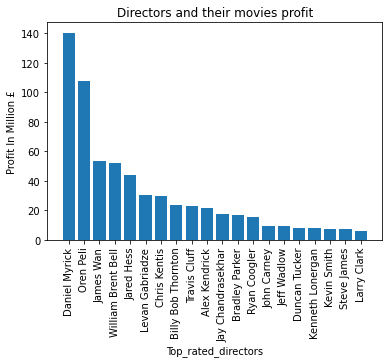

In [21]:
movie_dir_name=movie_dir[0:20]['director_name']
plt.bar(movie_dir_name,movie_x_dir['profit'])
plt.xticks(rotation = 90)
plt.xlabel('Top_rated_directors')
plt.ylabel('Profit In Million £')
plt.title('Directors and their movies profit')
plt.show()

Here the bar graph shows top 20 directors and the profits they have gained which can give us insight to whom we can chose to direct the movie.

# Hypothesis Testing

I will be performing the hypothesis testing based on the below scenario

Hypothesis: If the budget of the film is less than £1.5 million and directed by top 5 directors then average profit earned would be more than 30 million.

Null Hypothesis :The average profit earned by the movies directed within £1.5 million budget by top 5 directors is less than or equal £30 million
    $H_0$  : μ <= 30
 
Alternate Hypothesis:The average profit earned by the movies directed within £1.5 million budget by top 5 directors is more than £30 million
    $H_1$  : μ > 30

Here I am considering top 5 directors as independent variable and average profit as dependent variable. The reason being if I change the list of director who are directing film to another set the average profit would change according for that group of directors.

So to test my hypothesis, I need to find the mean, standard deviation and count of the profit of top 5 directors that I got from the EDA analysis. So that I can perform t test on the data of top 5 director. 

In [22]:
#Taking Top 5 directors from dataframe
Top5=movie_x_dir.head(5)
# Finding mean, standard deviation,count of the top 5 directors' profit
Top5_profit=movie_x_dir.head(5)['profit']
top5_mean=Top5['profit'].mean()
top5_std=Top5['profit'].std()
top5_count=Top5['profit'].count()

In [23]:
top5_mean

79.5961356

In [24]:
#Transforming normally distributed random variable to standard normal distribution using Z transformation
t=(top5_mean-30)/(top5_std/np.sqrt(top5_count))

In [25]:
#Displaying t which is z value here
t

2.612565306112361

Here I will be performing t-test from the obtained t(z score) as we are only considering small sample of data for hypothesis testing.

In [31]:
#Calculating p value from obtained z scores for t-test
p_value_from_t=(1-stats.t.cdf(t,top5_count-1))
#only one tail test is carried out
print ('one tail p value from t: ', p_value_from_t)

one tail p value from t:  0.02963003290705557


In [32]:
#Here using scipy 1 sample ttest function calculating p value
top_profit_ttest=stats.ttest_1samp(Top5_profit,30) 
#Here we get z score and p value
#But it performs 2 tail test on distribution so we divide by 2 to get value of one tail
one_tail_p = top_profit_ttest.pvalue/2
print ('one_tail p from scipy:{}'.format(one_tail_p))
german_budget_ttest

one_tail p from scipy:0.029630032907055515


Ttest_1sampResult(statistic=2.612565306112361, pvalue=0.05926006581411103)

I will be considering the significance level of 5%.The p_value that I obtained from the t-test is <0.05, that means only 2.9% probability of null hypothesis will get accepted.Hence, I will reject my null hypothesis which is the average profit earned by the movies directed within £1.5 million budget by top 5 directors is less than or equal £30 million as it is less probable to happen. Therefore I can accept the alternate hypothesis that states the average profit earned by the movies directed within £1.5 million budget by top 5 directors is more than £30 million. 


# Summary

I did analysis on the given movie dataset and came up with appropriate action plan to maximize the profit within targeted budget  £1.5 million. After performing EDA, I found the top five directors whose movies earned highest profit within the target budget. Based on hypothesis testing I came to conclusion that if the one of 5 directors directed a movie will earn an average profit of more than  £30 million.

Based on the analysis, I would like to suggest the company that for the next they want to produce they should bag one of the five director(Daniel Myrick,Oren Peli,James Wan,William Brent Bell,Jared Hess) to direct the movie so as to earn the profit of more than £30 million.